In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
# from sklearn.linear_model import LinearRegression

In [90]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [91]:
boston_df.head(20)
# (boston_df['CHAS']<=1).mean()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


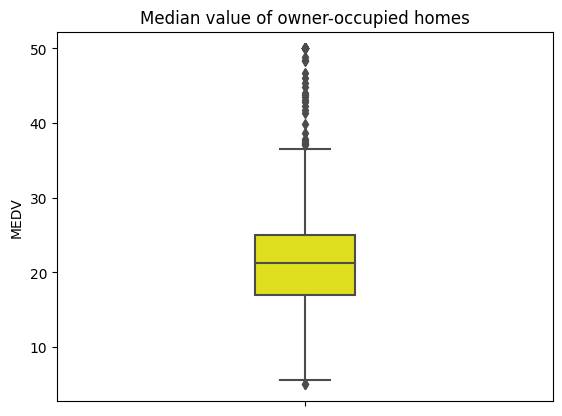

In [92]:
ax = sns.boxplot(y='MEDV', data=boston_df,width=0.2,color='yellow').set(title='Median value of owner-occupied homes')
plt.show()

C:\Users\SaiPranay\AppData\Local\Temp\ipykernel_12628\1767369282.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  b=sns.distplot(boston_df['CHAS'])


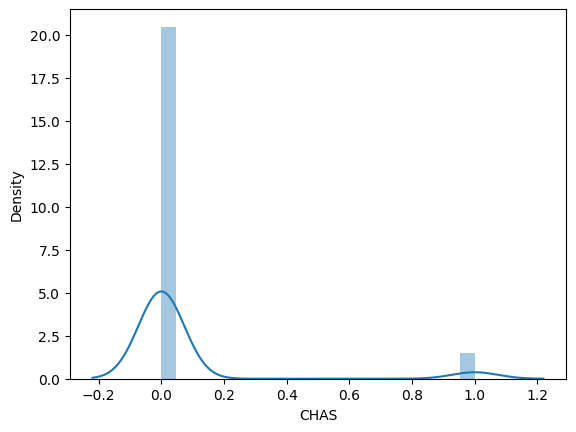

In [93]:
# ax = sns.distplot(y="CHAS", data=boston_df,width=0.2,color='red').set(title='Charles river variable')
b=sns.distplot(boston_df['CHAS'])
plt.show()

In [94]:
boston_df.loc[(boston_df['AGE']<=35),'age group']='35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70),'age group']='between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>=70),'age group']='70 years and older'

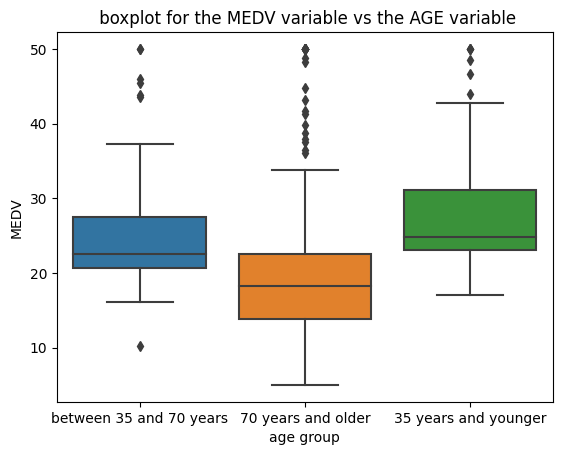

In [95]:
ax = sns.boxplot(y='MEDV',x='age group', data=boston_df).set(title=' boxplot for the MEDV variable vs the AGE variable')
plt.show()

In [96]:
boston_df.describe(include='all')

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age group
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70 years and older
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,287
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,NaN
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,NaN
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,NaN
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,NaN
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,NaN
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,NaN


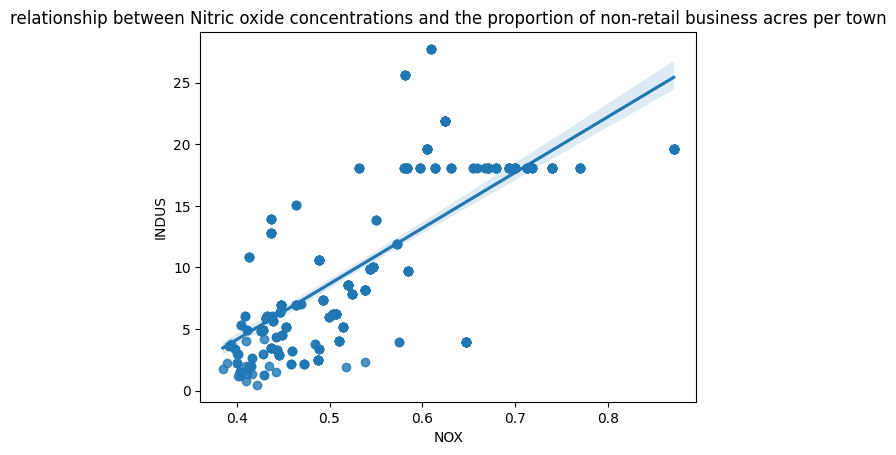

In [97]:
ax = sns.regplot(x='NOX', y='INDUS',data=boston_df).set(title='relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.show()

<h2>The above plot shows the strong corelation (or) positive corelation between Nitric oxide concentration and praportion of non retail business acres per town</h2>


C:\Users\SaiPranay\AppData\Local\Temp\ipykernel_12628\898865609.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  b=sns.distplot(boston_df['PTRATIO'])


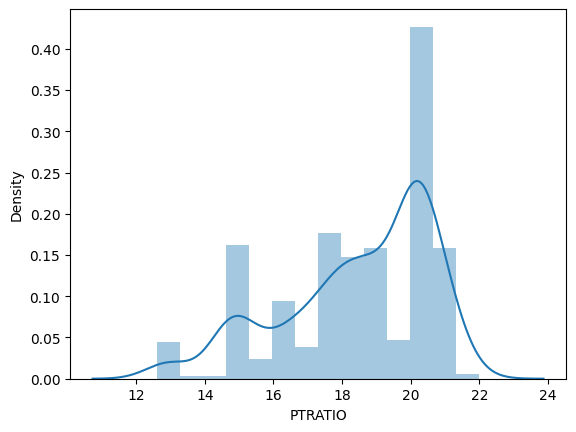

In [98]:
# ax=sns.histplot(x='PTRATIO',data=boston_df).set(title='pupil to teacher ratio variable')
b=sns.distplot(boston_df['PTRATIO'])
plt.show()

In [99]:
boston_df.groupby('CHAS').agg({'MEDV':['mean','var']})

MEDV            
           mean         var
CHAS                       
0.0   22.093843   77.992962
1.0   28.440000  139.633059

<h1> Question 1:</h1>
    <h1>Hypothesis</h1>
<p>H0:   There is no difference in median value of houses bounded by the Charles river</p>
<p>H1:   There is a difference in median value of houses bounded by the Charles river</p>

In [100]:
scipy.stats.ttest_ind(boston_df['MEDV'], boston_df['CHAS'])

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

<h2>Conclusion</h2>
<p>As the p-value is less than 0.05(significance level) we reject null hypothesis and state that there is a significant difference in the median value of houses bounded by the Charles river</p>

<h1>Question 2 :</h1>
<h1>Hypothesis</h1>
<p>H0:   There is no difference between three population means</p>
<p>H1:   There is a difference between atleast one of the three means</p>

In [101]:
boston_df.groupby('age group').agg({'MEDV':['mean','var']})

MEDV           
                              mean        var
age group                                    
35 years and younger     27.775824  58.342076
70 years and older       19.793380  90.542369
between 35 and 70 years  24.947656  48.572120

In [102]:
lessthan_35 = boston_df[boston_df['age group'] == "35 years and younger"]['MEDV']
lessthan35_greaterthan70 = boston_df[boston_df['age group'] == "between 35 and 70 years"]['MEDV']
greaterthan_70 = boston_df[boston_df['age group'] == "70 years and older"]['MEDV']
scipy.stats.f_oneway(lessthan_35, lessthan35_greaterthan70, greaterthan_70)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

<h2>Conclusion</h2>
<p>As the p-value is less than 0.05(significance level) we reject null hypothesis and state that there is a significant difference in the median value of houses  for each proportion of owner occupied units built prior to 1940 (age group)</p>

<h1>Question 3 :</h1>
<h1>Hypothesis</h1>
<p>H0:   There is no relation between Nitric oxide concentrations and proportion of non-retail business acres per town. </p>
<p>H1:   There is a relation between Nitric oxide concentrations and proportion of non-retail business acres per town.</p>

In [103]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209158, pvalue=7.91336106123623e-98)

<h2>Conclusion</h2>
<p>Since the p-value is less than 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.</p>
<p>We can also conclude the same by the above scatter plot</p>

<h1>Question 4 :</h1>
<h1>Hypothesis</h1>
<p>H0:   There is no impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes. </p>
<p>H1: There is impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes.  </p>

In [106]:
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           1.21e-08
Time:                        14:12:12   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h2>Conclusion</h2>
<p>As p-value is less than 0.05, we reject null hypothesis and as the coefficient is positive we say that additional weighted distance to five Boston Employement Centres have a positive impact on median value of owner occupied homes</p>